<a href="https://colab.research.google.com/github/eleven111101/NLP_NaturalLanguageProcessing/blob/main/Amazon_Reviewer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("Hello_World")

Hello_World


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import nltk



In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
df=pd.read_csv("Amazon Customer Reviews.csv")

In [7]:
df.head()

,reviewer,review
0,Outdoor Enthusiast,A bag helps with carrying the Outland Firebowl...
1,Outdoor Enthusiast,"A bit over 3 years ago, I purchased the 50' Fo..."
2,Outdoor Enthusiast,After having tried the Blackberry Bellini and ...
3,Ronny Acosta,"After overplucking and waxing, I bought this t..."
4,Ronny Acosta,After using this during a very cold hiking tri...


In [9]:
df["length"]=df["review"].apply(len)

In [11]:
df.head()

,reviewer,review,length
0,Outdoor Enthusiast,A bag helps with carrying the Outland Firebowl...,515
1,Outdoor Enthusiast,"A bit over 3 years ago, I purchased the 50' Fo...",701
2,Outdoor Enthusiast,After having tried the Blackberry Bellini and ...,546
3,Ronny Acosta,"After overplucking and waxing, I bought this t...",1375
4,Ronny Acosta,After using this during a very cold hiking tri...,798


<Axes: xlabel='count', ylabel='reviewer'>

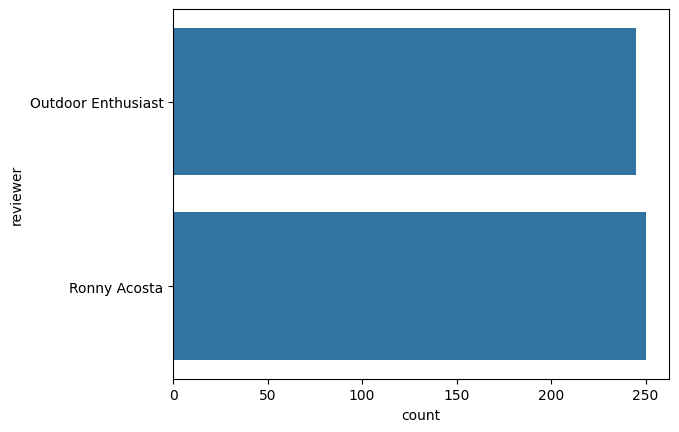

In [12]:
sns.countplot(df["reviewer"])

array([[<Axes: title={'center': 'length'}>]], dtype=object)

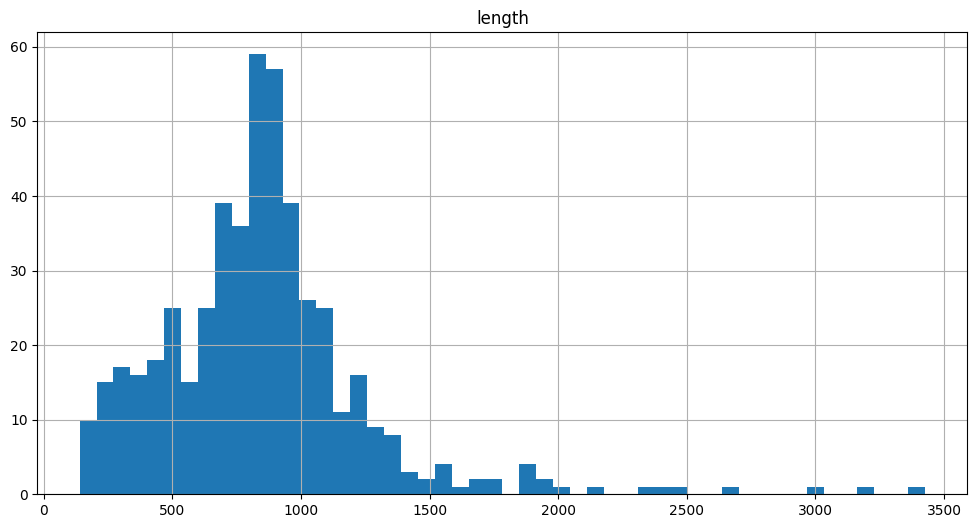

In [14]:
df.hist(column="length",bins=50,figsize=(12,6))

array([<Axes: title={'center': 'Outdoor Enthusiast'}>,
       <Axes: title={'center': 'Ronny Acosta'}>], dtype=object)

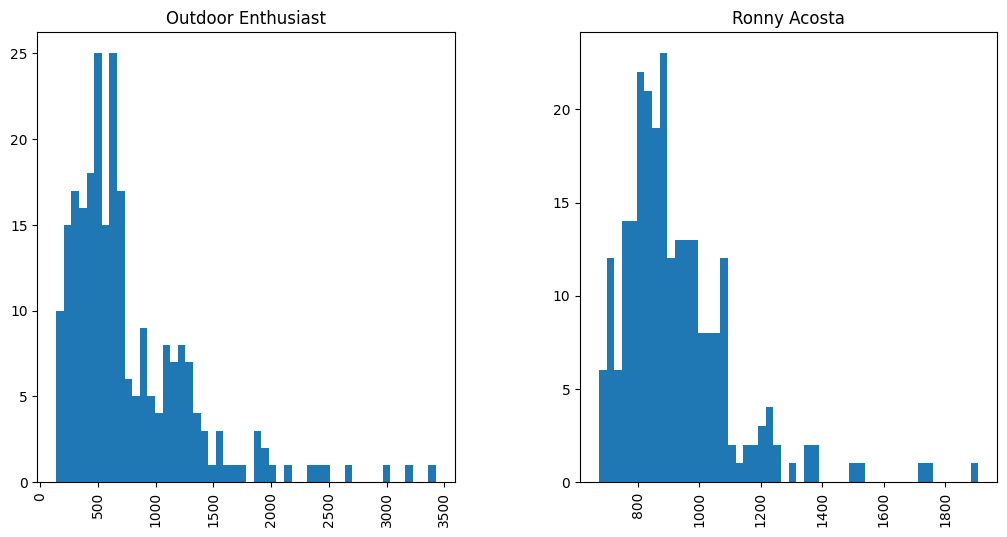

In [15]:
df.hist(column="length",by="reviewer",bins=50,figsize=(12,6))

In [18]:
df[df["length"]>2000].sort_values(by="length",ascending=False)

,reviewer,review,length
310,Outdoor Enthusiast,Our studio's business has expanded a bit and w...,3426
154,Outdoor Enthusiast,I have been doing DIY projects for more than a...,3183
346,Outdoor Enthusiast,The Pimax Vision was introduced as a Kickstart...,2980
262,Outdoor Enthusiast,It took me a loooong time trying to decide whi...,2639
249,Outdoor Enthusiast,"I was very, VERY skeptical of these massage gu...",2481
65,Outdoor Enthusiast,"I am an avid hiker, camper, and wilderness bac...",2395
494,Outdoor Enthusiast,"You might wonder, what is the difference betwe...",2372
244,Outdoor Enthusiast,I wanted to get a gazebo/pergola for some time...,2145


In [25]:
df.groupby("reviewer")["length"].max()

reviewer
Outdoor Enthusiast    3426
Ronny Acosta          1908
Name: length, dtype: int64

In [29]:
print(df[df["length"] == df['length'].max()]["review"].iloc[0])

Our studio's business has expanded a bit and we purchased an additional set. Our original review for the 2-pack is the same as for this 3-pack. I had been a professional photographer since 2008 and retired six years ago to focus on being as good of a father to my children as possible. That did not mean hanging up my cameras. I still use them to photograph my kids as they grew through the years. Towards the end of my photography career, I traded my bulb/umbrella setup for a RGB LED based lighting system instead, primarily for the lighter weight, more compact size, and battery portability. As a bonus, I liked the ability to control the lights via a Bluetooth-connected smartphone app without having to interrupt my shoots with the infant/toddler kids. RGB LED lights allow you to simulate and color-correct certain lighting conditions. From cool daylight (5600 Kelvin) to warm sunsets (3200K) and control over the intensity, hue, and saturation of the lights, the variety of scenes you could us

array([<Axes: title={'center': 'Outdoor Enthusiast'}>,
       <Axes: title={'center': 'Ronny Acosta'}>], dtype=object)

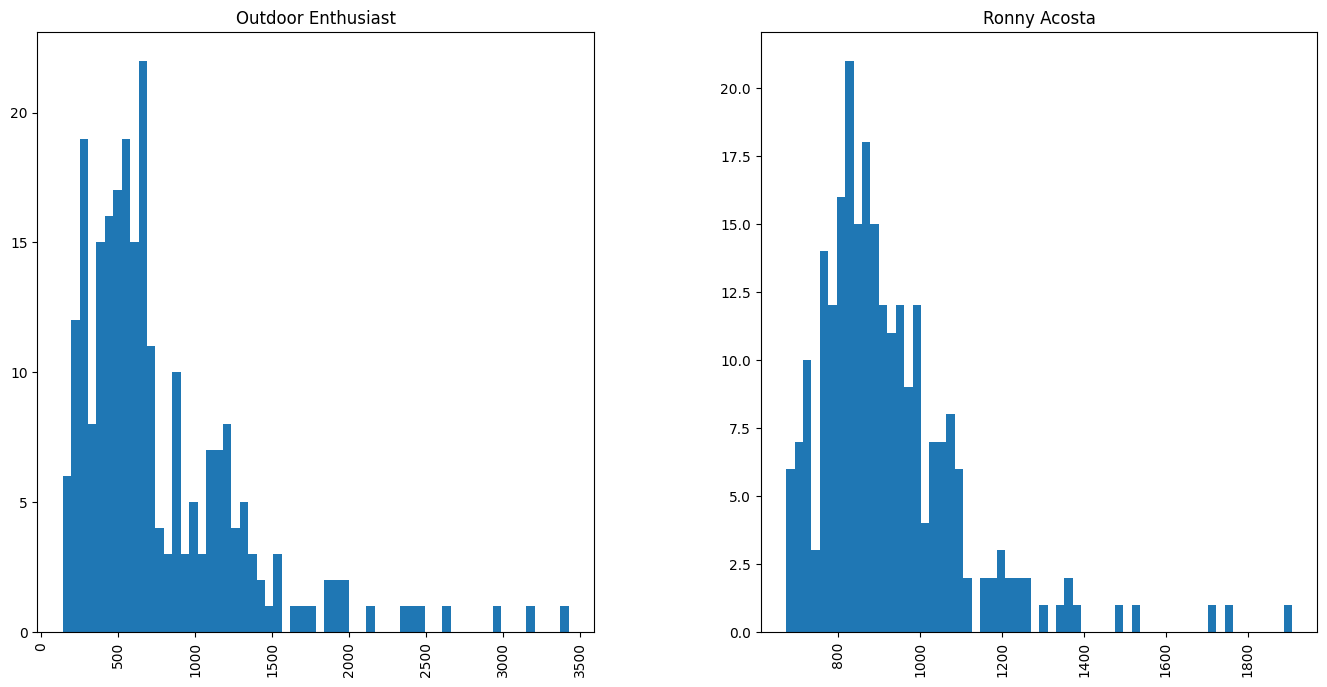

In [49]:
df.hist(column="length",by="reviewer",bins=60,figsize=(16,8))

In [34]:
df["reviewer"].unique()

array(['Outdoor Enthusiast', 'Ronny Acosta'], dtype=object)

In [40]:
df["reviewer"].value_counts()

reviewer
Ronny Acosta          250
Outdoor Enthusiast    245
Name: count, dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reviewer  495 non-null    object
 1   review    495 non-null    object
 2   length    495 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 11.7+ KB


In [54]:
df.describe()

,length
count,495.000000
mean,846.494949
std,408.464553
min,140.000000
25%,626.500000
50%,832.000000
75%,995.500000
max,3426.000000


from matplotlib import pyplot as plt
_df_2['length'].plot(kind='hist', bins=20, title='length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['length'].plot(kind='line', figsize=(8, 4), title='length')
plt.gca().spines[['top', 'right']].set_visible(False)

In [58]:
test_str = "Parents Warning! Children under 12 years must be accompanied by the Parents"
test = pd.DataFrame([test_str])

In [61]:
test[0][0]

'Parents Warning! Children under 12 years must be accompanied by the Parents'

In [62]:
 import re
 wo_num = re.sub("\w*\d\w*","",test[0][0])

In [65]:
wo_num

'Parents Warning! Children under  years must be accompanied by the Parents'

In [66]:
 import string
 string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [67]:
wo_punc = [letter for letter in wo_num if letter not in string.punctuation]

In [69]:
print(wo_punc)

['P', 'a', 'r', 'e', 'n', 't', 's', ' ', 'W', 'a', 'r', 'n', 'i', 'n', 'g', ' ', 'C', 'h', 'i', 'l', 'd', 'r', 'e', 'n', ' ', 'u', 'n', 'd', 'e', 'r', ' ', ' ', 'y', 'e', 'a', 'r', 's', ' ', 'm', 'u', 's', 't', ' ', 'b', 'e', ' ', 'a', 'c', 'c', 'o', 'm', 'p', 'a', 'n', 'i', 'e', 'd', ' ', 'b', 'y', ' ', 't', 'h', 'e', ' ', 'P', 'a', 'r', 'e', 'n', 't', 's']


In [70]:
wo_punc = "".join(wo_punc)

In [71]:
wo_punc

'Parents Warning Children under  years must be accompanied by the Parents'

In [72]:
wo_punc.split()

['Parents',
 'Warning',
 'Children',
 'under',
 'years',
 'must',
 'be',
 'accompanied',
 'by',
 'the',
 'Parents']